301
301
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 301
    # variables        = 4
    chi-square         = 12.1867036
    reduced chi-square = 0.04103267
    Akaike info crit   = -957.236198
    Bayesian info crit = -942.407756
[[Variables]]
    amp:    5.03087926 +/- 0.04005805 (0.80%) (init = 10)
    decay:  0.02495454 +/- 4.5395e-04 (1.82%) (init = 0.1)
    shift: -0.10264934 +/- 0.01022298 (9.96%) (init = 0)
    omega:  2.00026304 +/- 0.00326184 (0.16%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(shift, omega) = -0.785
    C(amp, decay)   = 0.584
    C(amp, shift)   = -0.118


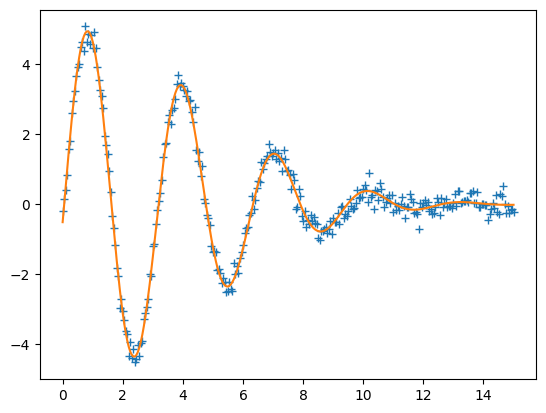

In [8]:
# <examples/doc_parameters_basic.py>
import numpy as np

from lmfit import Minimizer, Parameters, report_fit

# create data to be fitted
x = np.linspace(0, 15, 301)
np.random.seed(2021)
data = (5.0 * np.sin(2.0*x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=x.size, scale=0.2))

print(len(data))
# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    return model - data


# create a set of Parameters
params = Parameters()
params.add('amp', value=10, min=0)
params.add('decay', value=0.1)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
params.add('omega', value=3.0)



# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    import matplotlib.pyplot as plt
    plt.plot(x, data, '+')
    plt.plot(x, final)
    plt.show()
except ImportError:
    pass
# <end of examples/doc_parameters_basic.py>